<a href="https://colab.research.google.com/github/Wishy-S/LearningML/blob/master/EDA_InsuranceClaimPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ins1 = pd.read_csv('/content/insurance2.csv')
ins2 = pd.read_csv('/content/insurance3r2.csv')

In [7]:
ins1.shape,ins2.shape

((1338, 8), (1338, 9))

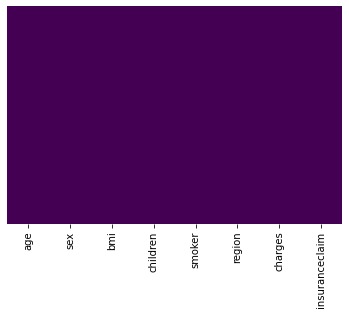

In [8]:
import seaborn as sns
sns.heatmap(ins1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

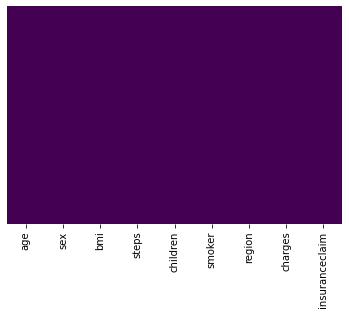

In [9]:
sns.heatmap(ins2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
ins1.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [11]:
ins2.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [12]:
ins2.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


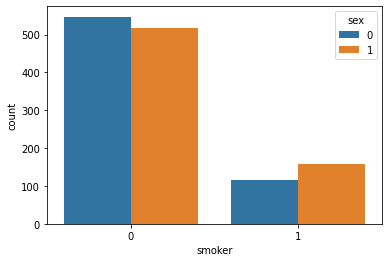

In [13]:
sns.countplot(x='smoker',hue ='sex',data=ins1)

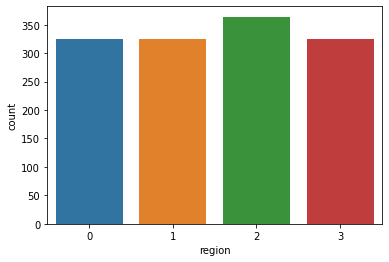

In [14]:
sns.countplot(x = 'region',data = ins1)

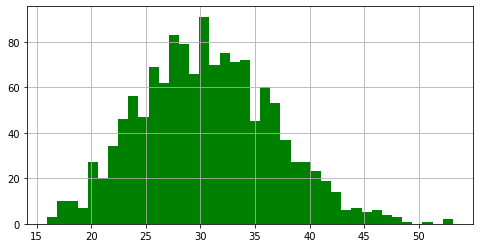

In [15]:
ins2['bmi'].hist(color='green',bins=40,figsize=(8,4))

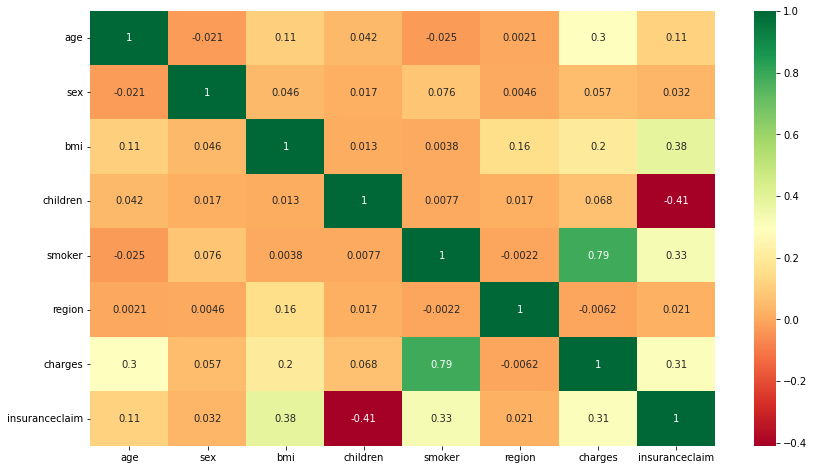

In [16]:
#Plotting correlation
import matplotlib.pyplot as plt
corrmat=ins1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))
#To plot heatmap
import seaborn as sns
g=sns.heatmap(ins1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#Assigning labels
X = ins2.iloc[ :, :8]
y = ins2.iloc[:, -1:]

In [18]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

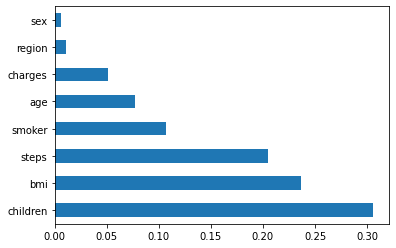

In [19]:
##To plot feature importances
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(len(X.columns)).plot(kind='barh')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler=sc.fit(X)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy ::  0.9440298507462687
Precision ::  0.9666666666666667


[Text(33.0, 0.5, 'true'), Text(0.5, 15.0, 'predict')]

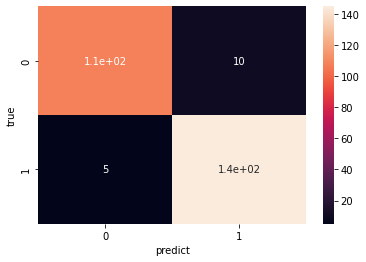

In [23]:
#Using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=1700,random_state=5)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')


In [24]:
models = []

def classification_Models(X_train,X_test, y_train, y_test ):
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('SVM',  SVC()) )
    modelresults = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modelresults.append(v_results)
        modelnames.append(name)
        
    print(modelresults)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modelresults)
        
classification_Models(X_train,X_test, y_train, y_test)

NameError: ignored